<a href="https://colab.research.google.com/github/HimanshuSahoo/DATA-SCIENCE/blob/main/Himanshu_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
from time import time

In [ ]:
#data processing libraries 

from sklearn import preprocessing

import nltk
from nltk.stem.porter import PorterStemmer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Evaluate the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
def get_page(url):
    page = requests.get(url)
    soup = bs(page.text,"lxml")
    return soup

In [ ]:
def get_links(soup):
    links=[]
    listings = soup.find_all('a' ,{'class' : 'bookTitle'})
    base_url="https://www.goodreads.com"
    for i in listings:
        book_link = i.get("href")
        complete_link  = base_url + book_link
        links.append(complete_link)
    return links

In [ ]:
#extract info from each link


def extract_info(links):
    for link in links:
        res = requests.get(link).text
        book_soup = bs(res, 'html.parser')
        try:
            book_id = book_soup.find(
                'div', {'id': 'buyButtonContainer'}).get('data-book-id')
            title = book_soup.find('h1', {'id': "bookTitle"}).text.strip()
            author = book_soup.find('span', {'itemprop': "name"}).text.strip()
            average_rating = book_soup.find(
                'span', {'itemprop': "ratingValue"}).text.strip()
            #description = book_soup.find('div',{'id':"description"}).text.strip()
            description = book_soup.find('div', {'id': "description"}).find_all('span')[
                1].text.strip()
            genre = book_soup.find(
                'a', {'class': "actionLinkLite bookPageGenreLink"}).text.strip()
            book_image_url = book_soup.find(
                'img', {'id': 'coverImage'}).get('src').strip()
            book_url = link
        except AttributeError:
            continue

        book = {'book_id': book_id, 'title': title, 'author': author, 'average_rating': average_rating,
                'genre': genre, 'description': description, 'url': book_url, 'image_url': book_image_url}
        all_books.append(book)
    return len(all_books)

In [ ]:
all_books = []
books  = pd.DataFrame()
for page in range(1,51):
    url = "https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page={}".format(page)
    soup = get_page(url)
    links = get_links(soup)
    (extract_info(links))

IndexError: list index out of range

In [ ]:
books = pd.DataFrame(all_books)

In [ ]:
books.to_csv('books_data_40.csv')

In [ ]:
books = pd.read_csv('books_data_40.csv')
books.drop('Unnamed: 0',axis = 1,inplace = True)

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_id         53 non-null     int64  
 1   title           53 non-null     object 
 2   author          53 non-null     object 
 3   average_rating  53 non-null     float64
 4   genre           53 non-null     object 
 5   description     53 non-null     object 
 6   url             53 non-null     object 
 7   image_url       53 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.4+ KB


In [ ]:
#shape of the final dataframe
books.shape

(53, 8)

### EDA

In [ ]:
#checking null values
books.isnull().sum()

book_id           0
title             0
author            0
average_rating    0
genre             0
description       0
url               0
image_url         0
dtype: int64

In [ ]:
#checking duplicate rows
books.duplicated().sum()

0

In [ ]:
#dropping duplicates
books.drop_duplicates(keep = 'first',inplace = True)

In [ ]:
#check value count by genre
books.genre.value_counts()

Classics           30
Fantasy             6
Fiction             6
Childrens           3
Nonfiction          2
Science Fiction     2
Young Adult         2
Poetry              1
Historical          1
Name: genre, dtype: int64

### Distribution of data by Genre

<AxesSubplot:>

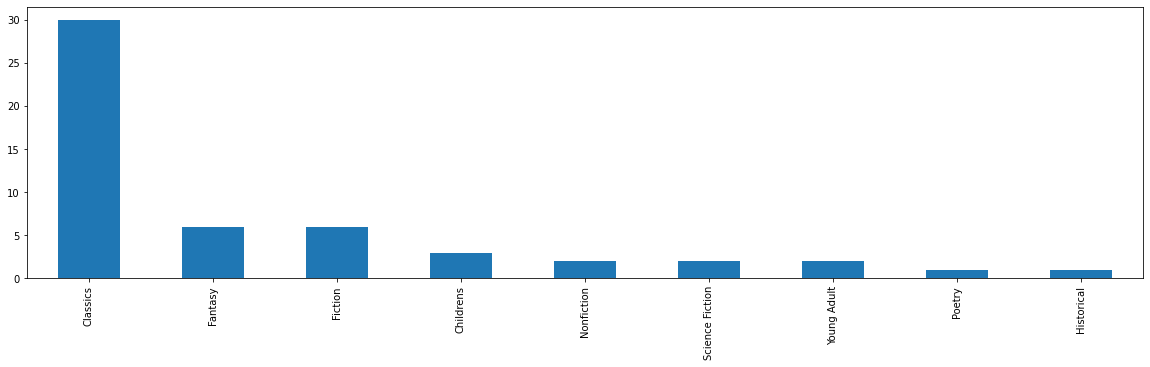

In [ ]:
books['genre'].value_counts().plot(x='genre',y = 'count',kind = 'bar',figsize = (20,5))

In [ ]:
#print the title and description of a random sample

print(books['title'][10])
books['description'][10]

The Book Thief


"Librarian's note: An alternate cover edition can be found hereIt is 1939. Nazi Germany. The country is holding its breath. Death has never been busier, and will be busier still.By her brother's graveside, Liesel's life is changed when she picks up a single object, partially hidden in the snow. It is The Gravedigger's Handbook, left behind there by accident, and it is her first act of book thievery. So begins a love affair with books and words, as Liesel, with the help of her accordian-playing foster father, learns to read. Soon she is stealing books from Nazi book-burnings, the mayor's wife's library, wherever there are books to be found.But these are dangerous times. When Liesel's foster family hides a Jew in their basement, Liesel's world is both opened up, and closed down.In superbly crafted writing that burns with intensity, award-winning author Markus Zusak has given us one of the most enduring stories of our time.(Note: this title was not published as YA fiction)"

In [ ]:
#print the title and description of a random sample

books.duplicated().sum()

0

<Figure size 864x720 with 0 Axes>

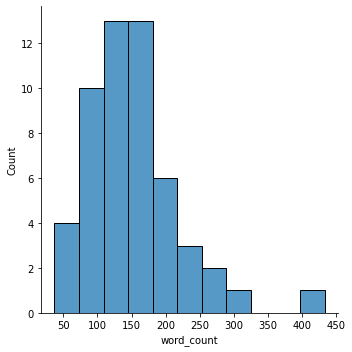

In [ ]:
#Calculating the word count for book description and adding a new column to the dataframe

import seaborn as sns
import matplotlib.pyplot as plt

books['word_count'] = books['description'].apply(lambda x: len(str(x).split()))  # Plotting the word count
plt.figure(figsize=[12, 10])
sns.displot(books['word_count'])

In [ ]:
books.head()

,book_id,title,author,average_rating,genre,description,url,image_url,word_count
0,2657,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...,137
1,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Fantasy,Harry Potter's life is miserable. His parents ...,https://www.goodreads.com/book/show/3.Harry_Po...,https://i.gr-assets.com/images/S/compressed.ph...,220
2,1885,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,https://www.goodreads.com/book/show/1885.Pride...,https://i.gr-assets.com/images/S/compressed.ph...,100
3,48855,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,https://www.goodreads.com/book/show/48855.The_...,https://i.gr-assets.com/images/S/compressed.ph...,166
4,170448,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,https://www.goodreads.com/book/show/170448.Ani...,https://i.gr-assets.com/images/S/compressed.ph...,123


### Data Preprocessing

In [ ]:
books['genre'].unique()

array(['Classics', 'Fantasy', 'Nonfiction', 'Historical', 'Fiction',
       'Young Adult', 'Childrens', 'Science Fiction', 'Poetry'],
      dtype=object)

In [ ]:
#filtering #1  books with genres consiting more than 100 books
df = books[books['genre'].map(books['genre'].value_counts()) > 100]

In [ ]:
df['genre'].value_counts()

Series([], Name: genre, dtype: int64)

In [ ]:
# creating a sub dataframe of fiction books with  less than 160 word count.
# As description is our main criteria for model accuracy and prediction , we are removing the books which has low word count.
df2 = df[(df.genre == 'Fiction') & (df.word_count <= 160)]
# dropping the  rows created in df2 from the df column.
df.drop(df2.index,axis=0,inplace=True)

In [ ]:
df.genre.value_counts()
# Updated genre count.

Series([], Name: genre, dtype: int64)

array([<AxesSubplot:ylabel='genre'>], dtype=object)

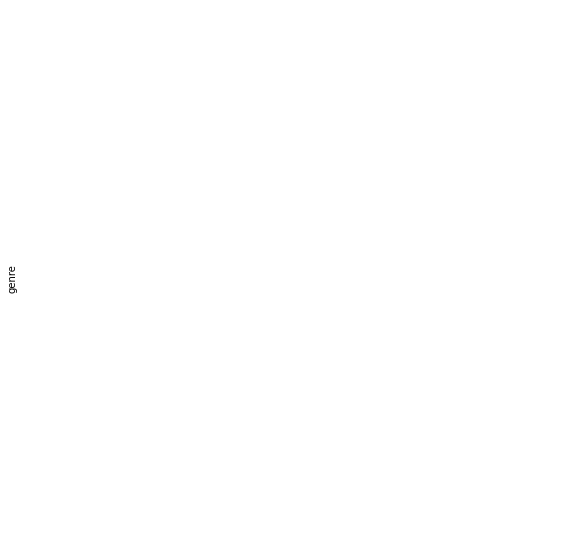

In [ ]:
df.genre.value_counts().plot(kind='pie', subplots=True, startangle=90,
figsize=(15,10), autopct='%1.1f%%')

In [ ]:
# Label encoding the Class column : Abusive = 0 and Non Abusive = 1

le = preprocessing.LabelEncoder()
df['genre_le'] = le.fit_transform(df.genre)

In [ ]:
df.genre.unique()
df.head()

,book_id,title,average_rating,genre,url,image_url,genre_le,tags


In [ ]:
df['author'] = df['author'].str.replace(" ","")
df['tags'] = df['author'] + " " + df['description']
df.drop(['word_count', 'author', 'description'], axis=1, inplace=True)
df['tags'] = df['tags'].apply(lambda x: x.lower())
df.head()

KeyError: 'author'

In [ ]:
#stemming
ps = PorterStemmer()

In [ ]:
def stemming(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

In [ ]:
df['tags'] = df['tags'].apply(stemming)
df.head()

,book_id,title,average_rating,genre,url,image_url,genre_le,tags


In [ ]:
# assign the independent features (text) to X variable and the target to y
X = pd.DataFrame(df['tags'])
y = df['genre_le']

In [ ]:
y

Series([], Name: genre_le, dtype: float64)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
y.value_counts()

Series([], Name: genre_le, dtype: int64)

In [ ]:
#performing oversampling on all genres except genre class  2
strategy = {0:400, 1:400, 2:598, 3:400, 4:400, 5:400,6:400}
os = RandomOverSampler(sampling_strategy = strategy)

In [ ]:
X_rs, y_rs = os.fit_resample(X,y)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [ ]:
from collections import Counter
print(Counter(y))

Counter()


In [ ]:
print(Counter(y_rs))

NameError: name 'y_rs' is not defined

In [ ]:
#performing undersampling on class 2
strategy = {0:400, 1:400, 2:400, 3:400, 4:400,5:400,6:400}
us = RandomUnderSampler(sampling_strategy = strategy)

In [ ]:
X_new, y_new = us.fit_resample(X_rs,y_rs)

NameError: name 'X_rs' is not defined

In [ ]:
print(Counter(y_new))

NameError: name 'y_new' is not defined

In [ ]:
y_new.value_counts().plot(x='y_new',y = 'count',kind = 'bar')

NameError: name 'y_new' is not defined

In [ ]:
y_new.shape

NameError: name 'y_new' is not defined

### Split the dataset into Train and Test sets

In [ ]:
#split data into training 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20, random_state=2021)

NameError: name 'X_new' is not defined

In [ ]:
X_train.head()

NameError: name 'X_train' is not defined

In [ ]:
x_train = X_train.iloc[:,0]
x_train.head()

NameError: name 'X_train' is not defined

### CountVectorizer - Feature Extraction

In [ ]:
#using countvectorizer
cv = CountVectorizer(max_features = 10000)

In [ ]:
x = cv.fit_transform(x_train).toarray()
x

NameError: name 'x_train' is not defined

In [ ]:
x_test = X_test.iloc[:,0]
x_test.head()

NameError: name 'X_test' is not defined

In [ ]:
test_x = cv.transform(x_test).toarray()
test_x.shape

NameError: name 'x_test' is not defined

### Model Fitting

In [ ]:
# Creating empty lists to store model training time, model predicting time, model accuracy scores, model precision scores.
training_time = []
predicting_time = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [ ]:
model1 = MultinomialNB()

In [ ]:
#train model and predict model training time
t0 = time()
model1.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

NameError: name 'x' is not defined

In [ ]:
# Predit using the trained model
t1 = time()
predicted = model1.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

NameError: name 'test_x' is not defined

In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))

NameError: name 'y_test' is not defined

In [ ]:
model2 = GaussianNB()

In [ ]:
#train model and predict model training time
t0 = time()
model2.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

NameError: name 'x' is not defined

In [ ]:
# Predit using the trained model
t1 = time()
predicted = model2.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

NameError: name 'test_x' is not defined

In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))

NameError: name 'y_test' is not defined

In [ ]:
model3 = tree.DecisionTreeClassifier()

In [ ]:
#train model and predict model training time
t0 = time()
model3.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

NameError: name 'x' is not defined

In [ ]:
# Predit using the trained model
t1 = time()
predicted = model3.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

NameError: name 'test_x' is not defined

In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))

NameError: name 'y_test' is not defined

In [ ]:
model5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [ ]:
#train model and predict model training time
t0 = time()
model5.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

NameError: name 'x' is not defined

In [ ]:
# Predit using the trained model
t1 = time()
predicted = model5.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

NameError: name 'test_x' is not defined

In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))

NameError: name 'y_test' is not defined

In [ ]:
model6 = LogisticRegression(max_iter=2000)

In [ ]:
#train model and predict model training time
t0 = time()
model6.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

NameError: name 'x' is not defined

In [ ]:
# Predit using the trained model
t1 = time()
predicted = model6.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

NameError: name 'test_x' is not defined

In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))

NameError: name 'y_test' is not defined

In [ ]:
model7 = SVC(kernel='linear',gamma='auto')

In [ ]:
#train model and predict model training time
t0 = time()
model7.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

NameError: name 'x' is not defined

In [ ]:
# Predit using the trained model
t1 = time()
predicted = model7.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

NameError: name 'test_x' is not defined

In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))

NameError: name 'y_test' is not defined

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

# create model
def create_model():
    model8 = Sequential()
    model8.add(Dense(10, input_dim=10000, kernel_initializer='uniform', activation='relu'))
    model8.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model8.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model8

# Create the model

model8 = KerasClassifier(build_fn=create_model,verbose = 0, batch_size = 10, epochs = 50 )

In [ ]:
t0 = time()
nn = model8.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

NameError: name 'x' is not defined

In [ ]:
t1 = time()
pred = model8.predict(test_x).round(1) 
predicting_time.append(round(time()-t1, 3))

print(pred[0:5]) 

NameError: name 'test_x' is not defined

In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,pred))

accuracy_scores.append(accuracy_score(y_test,pred).round(2))

print("Classification Report:\n",classification_report(y_test, pred))
clf_rep = precision_recall_fscore_support(y_test,pred)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, pred))

NameError: name 'y_test' is not defined

In [ ]:
model4 = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
#train model and predict model training time
t0 = time()
model4.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

NameError: name 'x' is not defined

In [ ]:
# Predit using the trained model
t1 = time()
predicted = model4.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

NameError: name 'test_x' is not defined

In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))

NameError: name 'y_test' is not defined

In [ ]:
model_name = ['Multinomial Bayes','Gaussian Bayes','Decision Tree','RandomForest','KNN','Logistic Regression','SVM','Neural Network']

In [ ]:
performance_table = pd.DataFrame({'Model_name' : model_name,
                            'Training time' : training_time,
                            'Prediction time' : predicting_time,
                            'Accuracy' : accuracy_scores,
                            'Precision' : precision_scores,
                            'Recall' : recall_scores,
                            'F1-scores' : f1_scores}).sort_values('F1-scores',ascending=False)

ValueError: arrays must all be same length

In [ ]:
performance_table

NameError: name 'performance_table' is not defined

In [ ]:
rec = ["A comet the color of blood and flame cuts across the sky. Two great leaders—Lord Eddard Stark and Robert Baratheon—who hold sway over an age of enf

SyntaxError: EOL while scanning string literal (<ipython-input-91-01e5af21392c>, line 1)

In [ ]:
t = cv.transform(rec).toarray()

NameError: name 'rec' is not defined

In [ ]:
pr = le.inverse_transform(model1.predict(t))

NameError: name 't' is not defined

In [ ]:
pr[0]

NameError: name 'pr' is not defined

In [ ]:
def recommend(genre):
    recommended_books = df[df['genre'] == genre].sort_values(by = 'average_rating',ascending = False).head()
    print(recommended_books.title)
        
    return

In [ ]:
recommend('Fantasy')

Series([], Name: title, dtype: object)
